<a href="https://colab.research.google.com/github/deepanshubanyal/deepanshubanyal.github.io/blob/main/%20Lok_Sabha_elections_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
result2014=pd.read_csv('https://drive.google.com/uc?export=download&id=1AS6vwbuRC8Mz60JmeF2IiEyYSjvWm9u-')
result2019=pd.read_csv('https://drive.google.com/uc?export=download&id=1AWBZbKXXWMwATTjh2dayWb53TGws7qUz')
codes=pd.read_csv("https://drive.google.com/uc?export=download&id=1APzf3Pg-V9Az194h82JVFladS_gUaBq8")

In [3]:
# checking how result2014 looks like
result2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [4]:
# checking how result2019 looks like
result2019.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


In [5]:
# checking how codes looks like
codes.head()

,state_name,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR


In [6]:
# printing basic info about df
result2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             7845 non-null   object 
 4   age             7845 non-null   float64
 5   category        7845 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB


In [7]:
# checking number of null values for each column
result2014.isna().sum()

state               0
pc_name             0
candidate           0
sex               510
age               510
category          510
party               0
party_symbol        0
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [8]:
# checking number of duplicate rows
result2014.duplicated().sum()

0

In [9]:
# printing basic info about df
result2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8597 non-null   object 
 1   pc_name         8597 non-null   object 
 2   candidate       8597 non-null   object 
 3   sex             8054 non-null   object 
 4   age             8054 non-null   float64
 5   category        8054 non-null   object 
 6   party           8597 non-null   object 
 7   party_symbol    8054 non-null   object 
 8   general_votes   8597 non-null   int64  
 9   postal_votes    8597 non-null   int64  
 10  total_votes     8597 non-null   int64  
 11  total_electors  8597 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 806.1+ KB


In [10]:
# checking number of null values for each column
result2019.isna().sum()

state               0
pc_name             0
candidate           0
sex               543
age               543
category          543
party               0
party_symbol      543
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [11]:
# checking number of duplicate rows
result2019.duplicated().sum()

0

### **Data Cleaning**

In [13]:
# finding all unique pc_name of Telangana state
telangana_pcs=result2019[result2019.state=="Telangana"]['pc_name'].unique()
telangana_pcs

array(['Adilabad ', 'Peddapalle ', 'Karimnagar ', 'Nizamabad',
       'Zahirabad', 'Medak', 'Malkajgiri', 'Secundrabad', 'Hyderabad',
       'CHEVELLA', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir ',
       'Warangal', 'Mahabubabad  ', 'Khammam '], dtype=object)

In [14]:
# in result 2014 updating state Telangana for corrosponding pc_name in telengana_pcs array
result2014.loc[result2014['pc_name'].isin(telangana_pcs),'state']='Telangana'
result2014[result2014.state=="Telangana"]

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...
277,Telangana,Khammam,RAMESH KOMMU,M,42.0,SC,IND,Gas Stove,1273,1,1274,1440267
278,Telangana,Khammam,RAMU KANDULA,M,35.0,SC,IND,Coconut,1021,0,1021,1440267
279,Telangana,Khammam,LINGALA RAVI KUMAR,M,38.0,SC,IND,Gas Cylinder,9459,1,9460,1440267
280,Telangana,Khammam,SANAPA POMMAIAH,M,50.0,ST,IND,BUCKET,889,0,889,1440267


### **Transforming**

In [15]:
result14_19=pd.concat([result2014,result2019],keys=[2014,2019])
result14_19

state     pc_name                   candidate     sex   age  \
2014 0      Telangana   Adilabad                 GODAM NAGESH       M  49.0   
     1      Telangana   Adilabad                       NARESH       M  37.0   
     2      Telangana   Adilabad                RAMESH RATHOD       M  48.0   
     3      Telangana   Adilabad              RATHOD SADASHIV       M  55.0   
     4      Telangana   Adilabad             NETHAWATH RAMDAS       M  44.0   
...               ...         ...                         ...     ...   ...   
2019 8592  Puducherry  Puducherry  TIRAVITAMANKAI@LOURDHUMARY  FEMALE  57.0   
     8593  Puducherry  Puducherry                 IMS. BALAJI    MALE  32.0   
     8594  Puducherry  Puducherry                    RAMESH.D    MALE  49.0   
     8595  Puducherry  Puducherry               V. RAMAMURTHI    MALE  74.0   
     8596  Puducherry  Puducherry                        NOTA     NaN   NaN   

          category party    party_symbol  general_votes  postal_votes  \
2014 0          ST   TRS             Car         425762          5085   
     1          ST   INC            Hand         257994          1563   
     2          ST   TDP         Bicycle         182879          1319   
     3          ST   BSP        Elephant          94363            57   
     4          ST   IND  Auto- Rickshaw          41028             4   
...            ...   ...             ...            ...           ...   
2019 8592  GENERAL   IND           Slate            870             0   
     8593  GENERAL   IND             Bat           2546             0   
     8594       SC   IND            Mike           1653             0   
     8595  GENERAL   IND         Whistle            641             1   
     8596      NaN  NOTA             NaN          12192             7   

           total_votes  total_electors  
2014 0          430847         1386282  
     1          259557         1386282  
     2          184198         1386282  
     3           94420         1386282  
     4           41032         1386282  
...                ...             ...  
2019 8592          870          973410  
     8593         2546          973410  
     8594         1653          973410  
     8595          642          973410  
     8596        12199          973410  

[16952 rows x 12 columns]

In [16]:
result14_19=result14_19.reset_index().drop(columns={'level_1'}).rename(columns={'level_0':'year'})
result14_19

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,2014,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,2014,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,2014,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,2014,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,2014,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,2019,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,973410
16948,2019,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,973410
16949,2019,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,973410
16950,2019,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,973410


### **EDA**

1. List top 5/ bottom 5 constituencies of 2014 and 2019 in terms of voter turnout
ratio?

In [17]:
result14_19['total_votes_casted']=result14_19.groupby(['year','state','pc_name'])['total_votes'].transform('sum')
result14_19

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,total_votes_casted
0,2014,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282,1045839
1,2014,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,1045839
2,2014,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282,1045839
3,2014,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282,1045839
4,2014,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,1045839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,2019,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,973410,790760
16948,2019,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,973410,790760
16949,2019,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,973410,790760
16950,2019,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,973410,790760


In [18]:
# adding new column for voter turnout ratio
result14_19['voter_turnout_ratio']=result14_19.total_votes_casted/result14_19.total_electors

In [19]:
# List top 5 constituencies in terms of voter turnout ratio irrespective of year
result14_19[['year','state','pc_name','voter_turnout_ratio']].drop_duplicates().sort_values(by='voter_turnout_ratio',ascending=False).head()

,year,state,pc_name,voter_turnout_ratio
8748,2019,Assam,Dhubri,0.906616
693,2014,Assam,Dhubri,0.883534
4361,2014,Nagaland,Nagaland,0.878220
7629,2014,West Bengal,Tamluk,0.875864
15694,2019,West Bengal,Bishnupur,0.873063


In [20]:
# List bottom 5 constituencies in terms of voter turnout ratio irrespective of year
result14_19[['year','state','pc_name','voter_turnout_ratio']].drop_duplicates().sort_values(by='voter_turnout_ratio',ascending=True).head()

,year,state,pc_name,voter_turnout_ratio
10254,2019,Jammu & Kashmir,Anantnag,0.089353
10241,2019,Jammu & Kashmir,Srinagar,0.144308
2155,2014,Jammu & Kashmir,Srinagar,0.258618
2170,2014,Jammu & Kashmir,Anantnag,0.288423
10231,2019,Jammu & Kashmir,Baramulla,0.345706


In [21]:
#List top 5 constituencies of 2014  in terms of voter turnout ratio
result14_19[result14_19.year==2014][['year','state','pc_name','voter_turnout_ratio']].drop_duplicates().sort_values(by='voter_turnout_ratio',ascending=False).head()

,year,state,pc_name,voter_turnout_ratio
693,2014,Assam,Dhubri,0.883534
4361,2014,Nagaland,Nagaland,0.878220
7629,2014,West Bengal,Tamluk,0.875864
7712,2014,West Bengal,Bishnupur,0.867170
8317,2014,Lakshadweep,Lakshadweep,0.866131


In [22]:
#List bottom 5 constituencies of 2014  in terms of voter turnout ratio
result14_19[result14_19.year==2014][['year','state','pc_name','voter_turnout_ratio']].drop_duplicates().sort_values(by='voter_turnout_ratio',ascending=True).head()

,year,state,pc_name,voter_turnout_ratio
2155,2014,Jammu & Kashmir,Srinagar,0.258618
2170,2014,Jammu & Kashmir,Anantnag,0.288423
2139,2014,Jammu & Kashmir,Baramulla,0.391338
3835,2014,Maharashtra,Kalyan,0.428814
1303,2014,Bihar,Patna Sahib,0.453314


In [23]:
#List top 5 constituencies of 2019  in terms of voter turnout ratio
result14_19[result14_19.year==2019][['year','state','pc_name','voter_turnout_ratio']].drop_duplicates().sort_values(by='voter_turnout_ratio',ascending=False).head()

,year,state,pc_name,voter_turnout_ratio
8748,2019,Assam,Dhubri,0.906616
15694,2019,West Bengal,Bishnupur,0.873063
8774,2019,Assam,Barpeta,0.865531
15260,2019,West Bengal,Jalpaiguri,0.864853
8707,2019,Arunachal Pradesh,ARUNACHAL EAST,0.864601


In [24]:
#List bottom 5 constituencies of 2019  in terms of voter turnout ratio
result14_19[result14_19.year==2019][['year','state','pc_name','voter_turnout_ratio']].drop_duplicates().sort_values(by='voter_turnout_ratio',ascending=True).head()

,year,state,pc_name,voter_turnout_ratio
10254,2019,Jammu & Kashmir,Anantnag,0.089353
10241,2019,Jammu & Kashmir,Srinagar,0.144308
10231,2019,Jammu & Kashmir,Baramulla,0.345706
16523,2019,Telangana,Hyderabad,0.448367
11942,2019,Maharashtra,Kalyan,0.452930


2. List top 5/ bottom 5 states of 2014 and 2019 in terms of voter turnout ratio?

In [25]:
statewisedf=result14_19[['year','state','pc_name','total_votes_casted','total_electors']].drop_duplicates(subset=['year','pc_name']).groupby(['year','state'],as_index=False)[['total_votes_casted','total_electors']].sum()
statewisedf

,year,state,total_votes_casted,total_electors
0,2014,Andaman & Nicobar Islands,190328,269360
1,2014,Andhra Pradesh,30250855,38946048
2,2014,Arunachal Pradesh,596956,759344
3,2014,Assam,15085883,18837713
4,2014,Bihar,35885332,63800160
...,...,...,...,...
65,2019,Telangana,18642895,29708615
66,2019,Tripura,2153172,2614718
67,2019,Uttar Pradesh,84164704,142470095
68,2019,Uttarakhand,4842925,7856318


In [26]:
statewisedf['voter_turnout_ratio']=statewisedf.total_votes_casted/statewisedf.total_electors
statewisedf

,year,state,total_votes_casted,total_electors,voter_turnout_ratio
0,2014,Andaman & Nicobar Islands,190328,269360,0.706593
1,2014,Andhra Pradesh,30250855,38946048,0.776737
2,2014,Arunachal Pradesh,596956,759344,0.786147
3,2014,Assam,15085883,18837713,0.800834
4,2014,Bihar,35885332,63800160,0.562465
...,...,...,...,...,...
65,2019,Telangana,18642895,29708615,0.627525
66,2019,Tripura,2153172,2614718,0.823482
67,2019,Uttar Pradesh,84164704,142470095,0.590753
68,2019,Uttarakhand,4842925,7856318,0.616437


In [27]:
# List top 5 states in terms of voter turnout ratio irrespective of year
statewisedf.sort_values(by='voter_turnout_ratio',ascending=False).head()

,year,state,total_votes_casted,total_electors,voter_turnout_ratio
23,2014,Nagaland,1038910,1182972,0.878220
16,2014,Lakshadweep,43239,49922,0.866131
51,2019,Lakshadweep,47009,55189,0.851782
30,2014,Tripura,2023829,2388822,0.847208
6,2014,Dadra & Nagar Haveli,165286,196597,0.840735


In [28]:
# List bottom 5 states in terms of voter turnout ratio irrespective of year
statewisedf.sort_values(by='voter_turnout_ratio',ascending=True).head()

,year,state,total_votes_casted,total_electors,voter_turnout_ratio
47,2019,Jammu & Kashmir,3552622,7922538,0.448420
12,2014,Jammu & Kashmir,3566863,7183129,0.496561
4,2014,Bihar,35885332,63800160,0.562465
38,2019,Bihar,40806661,71216290,0.572996
31,2014,Uttar Pradesh,79061802,135329433,0.584217


In [29]:
# List top 5 states in terms of voter turnout ratio in 2014
statewisedf[statewisedf.year==2014].sort_values(by='voter_turnout_ratio',ascending=False).head()

,year,state,total_votes_casted,total_electors,voter_turnout_ratio
23,2014,Nagaland,1038910,1182972,0.878220
16,2014,Lakshadweep,43239,49922,0.866131
30,2014,Tripura,2023829,2388822,0.847208
6,2014,Dadra & Nagar Haveli,165286,196597,0.840735
27,2014,Sikkim,308967,370770,0.833312


In [30]:
# List bottom 5 states in terms of voter turnout ratio in 2014
statewisedf[statewisedf.year==2014].sort_values(by='voter_turnout_ratio',ascending=True).head()

,year,state,total_votes_casted,total_electors,voter_turnout_ratio
12,2014,Jammu & Kashmir,3566863,7183129,0.496561
4,2014,Bihar,35885332,63800160,0.562465
31,2014,Uttar Pradesh,79061802,135329433,0.584217
18,2014,Maharashtra,47734486,79209428,0.602636
17,2014,Madhya Pradesh,29639807,48121301,0.615939


In [31]:
# List top 5 states in terms of voter turnout ratio in 2014
statewisedf[statewisedf.year==2019].sort_values(by='voter_turnout_ratio',ascending=False).head()

,year,state,total_votes_casted,total_electors,voter_turnout_ratio
51,2019,Lakshadweep,47009,55189,0.851782
58,2019,Nagaland,1006357,1213777,0.829112
54,2019,Manipur,1617330,1959563,0.825352
66,2019,Tripura,2153172,2614718,0.823482
69,2019,West Bengal,57206976,70001284,0.817228


In [32]:
# List bottom 5 states in terms of voter turnout ratio in 2014
statewisedf[statewisedf.year==2019].sort_values(by='voter_turnout_ratio',ascending=True).head()

,year,state,total_votes_casted,total_electors,voter_turnout_ratio
47,2019,Jammu & Kashmir,3552622,7922538,0.448420
38,2019,Bihar,40806661,71216290,0.572996
67,2019,Uttar Pradesh,84164704,142470095,0.590753
57,2019,NCT OF Delhi,8679012,14327649,0.605753
53,2019,Maharashtra,52856024,86790662,0.609006


3. Which constituencies have elected the same party for two consecutive elections,
rank them by % of votes to that winning party in 2019

In [82]:
result14_19['rank']=result14_19.groupby(['year','state','pc_name'])['total_votes'].rank(method='dense',ascending=False)
result14_19['result']=result14_19.apply(lambda x :'winner' if x['rank']==1 else 'looser', axis=1)
win14=result14_19[(result14_19.year==2014) & (result14_19.result=="winner")].copy()
win19=result14_19[(result14_19.year==2019) & (result14_19.result=="winner")].copy()
joined=win14.merge(win19 ,on=['state','pc_name'])[['state',"pc_name",'party_x','party_y','total_votes_x','total_electors_x','total_votes_casted_x','total_votes_y','total_electors_y','total_votes_casted_y']].rename(columns={'party_x':'winner_2014',"party_y":'winner_2019'})
cons_win=joined[joined.winner_2014==joined.winner_2019].copy()
cons_win.loc[:,'vote_per']=cons_win.total_votes_y*100/cons_win.total_votes_casted_y
cons_win.loc[:,'rank']=cons_win['vote_per'].rank(method='dense',ascending=False)
cons_win.sort_values(by='rank')[['pc_name','winner_2014',	'winner_2019','rank','vote_per']]

,pc_name,winner_2014,winner_2019,rank,vote_per
122,Surat,BJP,BJP,1.0,74.470429
123,Navsari,BJP,BJP,2.0,74.367402
118,Vadodara,BJP,BJP,3.0,72.296842
135,Kangra,BJP,BJP,4.0,72.018463
310,Bhilwara,BJP,BJP,5.0,71.587233
...,...,...,...,...,...
282,Ludhiana,INC,INC,329.0,36.658214
442,Maldaha Dakshin,INC,INC,330.0,34.730246
142,Ladakh,BJP,BJP,331.0,33.943967
66,Kishanganj,INC,INC,332.0,33.316630


4. Which constituencies have voted for different parties in two elections (list top 10
based on difference (2019-2014) in winner vote percentage in two elections)

In [34]:
not_cons_win=joined[joined.winner_2014!=joined.winner_2019].copy()
not_cons_win.loc[:,'vote_per_2019']=not_cons_win.total_votes_y*100/not_cons_win.total_votes_casted_y
not_cons_win.loc[:,'vote_per_2014']=not_cons_win.total_votes_x*100/not_cons_win.total_votes_casted_x
not_cons_win.loc[:,'votes_per_diff']=abs(not_cons_win.vote_per_2019-not_cons_win.vote_per_2014)
not_cons_win.sort_values(by='votes_per_diff',ascending=False)[['pc_name',	'winner_2014',	'winner_2019','votes_per_diff']].head(10)

,pc_name,winner_2014,winner_2019,votes_per_diff
436,Alipurduars,AITC,BJP,24.774856
45,Autonomous District,INC,BJP,22.493807
352,Kanniyakumari,BJP,INC,22.190083
505,Puducherry,AINRC,INC,21.702286
82,Bhagalpur,RJD,JD(U),21.560902
362,Sambhal,BJP,SP,21.518279
141,Anantnag,JKPDP,JKN,21.237232
63,Jhanjharpur,BJP,JD(U),21.157116
240,Aurangabad,SHS,AIMIM,20.526359
171,Chikkballapur,INC,BJP,20.153329


5. Top 5 candidates based on margin difference with runners in 2014 and 2019.

In [35]:
a=result14_19[result14_19['rank']==1].merge(result14_19[result14_19['rank']==2] ,on=['year','state','pc_name']).copy()
a['margin_diff']=abs(a.total_votes_x-a.total_votes_y)

In [36]:
# Top 5 candidates based on margin difference with runners in 2014
a[a.year==2014].sort_values(by='margin_diff', ascending=False).head()[['state','pc_name','candidate_x','margin_diff']]

,state,pc_name,candidate_x,margin_diff
119,Gujarat,Vadodara,NARENDRA MODI,570128
368,Uttar Pradesh,Ghaziabad,VIJAY KUMAR SINGH,567260
124,Gujarat,Navsari,C. R. PATIL,558116
296,Rajasthan,Jaipur,RAMCHARAN BOHARA,539345
123,Gujarat,Surat,DARSHANA VIKRAM JARDOSH,533190


In [37]:
# Top 5 candidates based on margin difference with runners in 2019
a[a.year==2019].sort_values(by='margin_diff', ascending=False).head()[['state','pc_name','candidate_x','margin_diff']]

,state,pc_name,candidate_x,margin_diff
618,Gujarat,Navsari,C. R. Patil,689668
624,Haryana,Karnal,Sanjay Bhatia,656142
629,Haryana,Faridabad,KRISHAN PAL,638239
827,Rajasthan,Bhilwara,SUBHASH CHANDRA BAHERIA,612000
613,Gujarat,Vadodara,RANJANBEN BHATT,589177


6. % Split of votes of parties between 2014 vs 2019 at national level

In [38]:
# total votes casted in 2014
total_votes_casted_2014=result14_19[result14_19.year==2014][['year','state','pc_name','total_votes_casted']].drop_duplicates(subset=['year','state','pc_name'])['total_votes_casted'].sum()
total_votes_casted_2014

520018484

In [39]:
# % Split of votes of parties in 2014
party_2014=result14_19[result14_19.year==2014].groupby(['year','party'],as_index=False)['total_votes'].sum()
party_2014['votes_per']=party_2014.total_votes*100/total_votes_casted_2014
party_2014.sort_values(by='votes_per',ascending=False)

,year,party,total_votes,votes_per
80,2014,BJP,161047761,30.969622
163,2014,INC,96641749,18.584291
110,2014,BSP,22434033,4.314084
31,2014,AITC,21215661,4.079790
385,2014,SP,18632568,3.583059
...,...,...,...,...
4,2014,ABAS,296,0.000057
425,2014,VSP,263,0.000051
316,2014,RJAVP,259,0.000050
359,2014,RaJPa,217,0.000042


<Axes: ylabel='votes_per'>

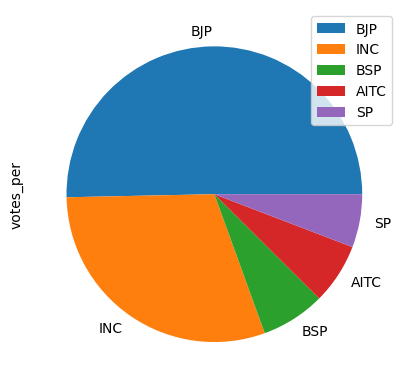

In [40]:
party_2014[['party',"votes_per"]].sort_values(by='votes_per',ascending=False).head().set_index('party').plot(kind='pie',y='votes_per')

In [41]:
# total votes casted in 2019
total_votes_casted_2019=result14_19[result14_19.year==2019][['year','state','pc_name','total_votes_casted']].drop_duplicates(subset=['year','state','pc_name'])['total_votes_casted'].sum()
total_votes_casted_2019

614172823

In [42]:
# % Split of votes of parties in 2019
party_2019=result14_19[result14_19.year==2019].groupby(['year','party'],as_index=False)['total_votes'].sum()
party_2019['votes_per']=party_2019.total_votes*100/total_votes_casted_2019
party_2019.sort_values(by='votes_per',ascending=False)

,year,party,total_votes,votes_per
126,2019,BJP,229076879,37.298440
239,2019,INC,119495214,19.456285
44,2019,AITC,24929330,4.059009
168,2019,BSP,22246501,3.622189
241,2019,IND,16583326,2.700107
...,...,...,...,...
198,2019,DKSP,346,0.000056
621,2019,ToP,330,0.000054
193,2019,CoAP,275,0.000045
197,2019,DJHP,273,0.000044


<Axes: ylabel='votes_per'>

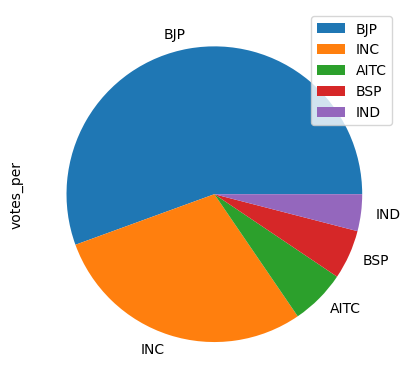

In [43]:
party_2019[['party',"votes_per"]].sort_values(by='votes_per',ascending=False).head().set_index('party').plot(kind='pie',y='votes_per')

7. % Split of votes of parties between 2014 vs 2019 at state level.

In [44]:
# statewise total votes casted
statewise_votescasted=result14_19[['year','state','pc_name','total_votes_casted']].drop_duplicates(subset=['year','pc_name']).groupby(['year','state'],as_index=False)['total_votes_casted'].sum()
statewise_votescasted

,year,state,total_votes_casted
0,2014,Andaman & Nicobar Islands,190328
1,2014,Andhra Pradesh,30250855
2,2014,Arunachal Pradesh,596956
3,2014,Assam,15085883
4,2014,Bihar,35885332
...,...,...,...
65,2019,Telangana,18642895
66,2019,Tripura,2153172
67,2019,Uttar Pradesh,84164704
68,2019,Uttarakhand,4842925


In [45]:
statewise_party_total_votes=result14_19.groupby(['year','state','party'],as_index=False)['total_votes'].sum()
statewise_party_total_votes

,year,state,party,total_votes
0,2014,Andaman & Nicobar Islands,AAAP,3737
1,2014,Andaman & Nicobar Islands,AIFB,225
2,2014,Andaman & Nicobar Islands,AITC,2283
3,2014,Andaman & Nicobar Islands,BJP,90969
4,2014,Andaman & Nicobar Islands,BSP,1139
...,...,...,...,...
2444,2019,West Bengal,SUCI(C),217376
2445,2019,West Bengal,SWJP,1899
2446,2019,West Bengal,UTSAP,2375
2447,2019,West Bengal,WPOI,23035


In [46]:
finaldf=statewise_party_total_votes.merge(statewise_votescasted)
finaldf['votes_per']=finaldf.total_votes*100/finaldf.total_votes_casted
# % Split of votes between parties  in 2014 on statelevel
finaldf[finaldf.year==2014]

,year,state,party,total_votes,total_votes_casted,votes_per
0,2014,Andaman & Nicobar Islands,AAAP,3737,190328,1.963453
1,2014,Andaman & Nicobar Islands,AIFB,225,190328,0.118217
2,2014,Andaman & Nicobar Islands,AITC,2283,190328,1.199508
3,2014,Andaman & Nicobar Islands,BJP,90969,190328,47.795910
4,2014,Andaman & Nicobar Islands,BSP,1139,190328,0.598441
...,...,...,...,...,...,...
1058,2014,West Bengal,SUCI,350616,51631828,0.679070
1059,2014,West Bengal,SWJP,5340,51631828,0.010342
1060,2014,West Bengal,TRMRPPI,1071,51631828,0.002074
1061,2014,West Bengal,WPOI,48006,51631828,0.092978


In [47]:
# % Split of votes between parties  in 2019 on statelevel
finaldf[finaldf.year==2019]

,year,state,party,total_votes,total_votes_casted,votes_per
1063,2019,Andaman & Nicobar Islands,AAAP,2839,207296,1.369539
1064,2019,Andaman & Nicobar Islands,AINHCP,212,207296,0.102269
1065,2019,Andaman & Nicobar Islands,AITC,1721,207296,0.830214
1066,2019,Andaman & Nicobar Islands,BJP,93901,207296,45.298028
1067,2019,Andaman & Nicobar Islands,BSP,2486,207296,1.199251
...,...,...,...,...,...,...
2444,2019,West Bengal,SUCI(C),217376,57206976,0.379982
2445,2019,West Bengal,SWJP,1899,57206976,0.003320
2446,2019,West Bengal,UTSAP,2375,57206976,0.004152
2447,2019,West Bengal,WPOI,23035,57206976,0.040266


8. List top 5 constituencies fortwo major national parties where they have gained vote
share in 2019 as compared to 2014.

In [48]:
#major national parties BJP,INC

In [49]:
result14_19['cons_vote_per']=result14_19.total_votes*100/result14_19.total_votes_casted
major_parties=result14_19[result14_19.party.isin(['BJP','INC'])]
tempdf1=major_parties[major_parties.year==2014].merge(major_parties[major_parties.year==2019] ,on=['state','pc_name','party'] ,suffixes=('_2014',"_2019"))
tempdf1['cons_vote_per_diff']=tempdf1.cons_vote_per_2019-tempdf1.cons_vote_per_2014

In [50]:
# top 5 constituencies for BJP where they have gained vote share in 2019 as compared to 2014
tempdf1[tempdf1.party=='BJP'].sort_values('cons_vote_per_diff',ascending=False)[['state','pc_name','party','cons_vote_per_2019','cons_vote_per_2014','cons_vote_per_diff']].head()

,state,pc_name,party,cons_vote_per_2019,cons_vote_per_2014,cons_vote_per_diff
461,Tripura,Tripura West,BJP,51.774264,5.099609,46.674656
665,West Bengal,Purulia,BJP,49.298203,7.158445,42.139758
462,Tripura,Tripura East,BJP,46.118056,6.373071,39.744986
624,West Bengal,Ranaghat,BJP,52.778607,17.268008,35.510598
661,West Bengal,Jhargram,BJP,44.558154,9.737415,34.820739


In [51]:
# top 5 constituencies for INC where they have gained vote share in 2019 as compared to 2014
tempdf1[tempdf1.party=='INC'].sort_values('cons_vote_per_diff',ascending=False)[['state','pc_name','party','cons_vote_per_2019','cons_vote_per_2014','cons_vote_per_diff']].head()

,state,pc_name,party,cons_vote_per_2019,cons_vote_per_2014,cons_vote_per_diff
451,Tamil Nadu,Karur,INC,63.063730,2.910464,60.153266
452,Tamil Nadu,Tiruchirappalli,INC,59.279413,5.214976,54.064437
449,Tamil Nadu,Arani,INC,54.004390,2.528817,51.475573
447,Tamil Nadu,Thiruvallur,INC,54.487856,3.504353,50.983504
448,Tamil Nadu,Krishnagiri,INC,52.635984,3.639585,48.996399


9. List top 5 constituencies fortwo major national parties where they have lost vote
share in 2019 as compared to 2014.

In [52]:
# top 5 constituencies for BJP where they have lost vote share in 2019 as compared to 2014
tempdf1[tempdf1.party=='BJP'].sort_values('cons_vote_per_diff',ascending=True)[['state','pc_name','party','cons_vote_per_2019','cons_vote_per_2014','cons_vote_per_diff']].head()

,state,pc_name,party,cons_vote_per_2019,cons_vote_per_2014,cons_vote_per_diff
33,Andhra Pradesh,Narsapuram,BJP,1.054054,49.617291,-48.563236
26,Andhra Pradesh,Visakhapatnam,BJP,2.733768,48.715406,-45.981638
47,Andhra Pradesh,Tirupati,BJP,1.227622,44.758718,-43.531096
372,Maharashtra,Sangli,BJP,42.774199,58.430014,-15.655815
712,Daman & Diu,Daman & diu,BJP,42.983228,53.832838,-10.849610


In [53]:
# top 5 constituencies for INC where they have lost vote share in 2019 as compared to 2014
tempdf1[tempdf1.party=='INC'].sort_values('cons_vote_per_diff',ascending=True)[['state','pc_name','party','cons_vote_per_2019','cons_vote_per_2014','cons_vote_per_diff']].head()

,state,pc_name,party,cons_vote_per_2019,cons_vote_per_2014,cons_vote_per_diff
373,Maharashtra,Ratnagiri - sindhudurg,INC,7.024621,38.274444,-31.249823
351,Maharashtra,Aurangabad,INC,7.660440,36.513374,-28.852934
52,Arunachal Pradesh,ARUNACHAL WEST,INC,14.220368,38.022731,-23.802363
607,West Bengal,Raiganj,INC,6.550890,28.504150,-21.953261
377,Manipur,Outer manipur,INC,17.774458,38.453365,-20.678908


10. Which constituency has voted the most for NOTA?

In [54]:
# constituency has voted the most for NOTA in 2014
result14_19[(result14_19.party=='NOTA') & (result14_19.year==2014)].sort_values(by='total_votes',ascending=False).head(1)[['pc_name','total_votes']]

,pc_name,total_votes
5416,Nilgiris,46559


In [55]:
# constituency has voted the most for NOTA in 2019
result14_19[(result14_19.party=='NOTA') & (result14_19.year==2019)].sort_values(by='total_votes',ascending=False).head(1)[['pc_name','total_votes']]

,pc_name,total_votes
9153,Gopalganj (SC),51660


In [56]:
# constituency has voted the most for NOTA in 2014 and 2019 combined
result14_19[result14_19.party=='NOTA'].sort_values(by='total_votes',ascending=False).groupby(['state','pc_name'], as_index=False)['total_votes'].sum().sort_values(by='total_votes',ascending=False).head(1)[['pc_name','total_votes']]

,pc_name,total_votes
52,Gopalganj (SC),69501


1 1 . Which constituencies have elected candidates whose party has less than 10% vote
share at state level in 2019?

In [70]:
a=finaldf[finaldf.year==2019].merge(result14_19[result14_19.year==2019][['year','state','pc_name','party','rank']], on=['year','state','party']).copy()
a[(a.votes_per<10) & (a['rank']==1)][['pc_name']]

,pc_name
390,Dhubri
457,Kokrajhar
705,Kishanganj
996,Vaishali
997,Hajipur (SC)
998,Samastipur (SC)
999,Khagaria
1000,Nawada
1001,Jamui (SC)
2178,Baramulla


12. Is there a correlation between postal votes % and voter turnout %?

In [77]:
result14_19['postal_votes_per']=result14_19.postal_votes*100/result14_19.total_votes
result14_19[['postal_votes_per','voter_turnout_ratio']].corr()


,postal_votes_per,voter_turnout_ratio
postal_votes_per,1.000000,0.025621
voter_turnout_ratio,0.025621,1.000000


<Axes: xlabel='postal_votes_per', ylabel='voter_turnout_ratio'>

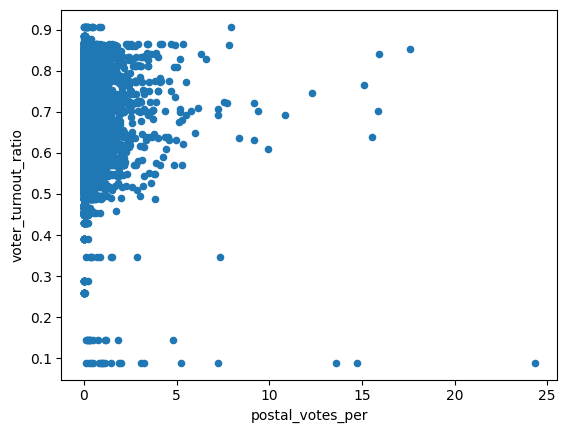

In [78]:
result14_19[['postal_votes_per','voter_turnout_ratio']].plot(kind='scatter',x='postal_votes_per',y='voter_turnout_ratio')